In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pickle
from deap import base
from deap import creator
import os

In [2]:
root = './simple_ea_e7_8_runs_0_to_9/'
file_list = []
for i in range(10):
    file = root + 'simple_ea_experiment_runs_' + str(i)
    file_list.append(file)
print(file_list)

['./simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_0', './simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_1', './simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_2', './simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_3', './simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_4', './simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_5', './simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_6', './simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_7', './simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_8', './simple_ea_e7_8_runs_0_to_9/simple_ea_experiment_runs_9']


In [3]:
def get_pickle_object(file_path: str):
    file = open(file_path,'rb')
    object_file = pickle.load(file)
    return object_file

In [4]:
# Init experiment
experiment_name = 'simple_ea_generalized_agent_plot'
OUTPUT_DIR = './' + experiment_name + '/'
if not os.path.exists(experiment_name):
    os.makedirs(experiment_name)

In [27]:
def get_stats_simple_ea(nested_dict):
    max_f = []
    avg_f = []
    for key, value in nested_dict.items():
        max_f.append(value['max_f'])
        avg_f.append(value['avg_f'])
    return max_f, avg_f

In [28]:
def plot_stats(mean_max_f, std_max_f, mean_avgs, std_avgs, title, file_dir=None, file_name=''):
    generation = range(len(mean_max_f))[:400]
    max_fitness = np.array(mean_max_f)[:400]
    std_max_fitness = np.array(std_max_f)[:400]
    mean_avgs = np.array(mean_avgs)[:400]
    std_avgs = np.array(std_avgs)[:400]

    plt.plot(generation, max_fitness, 'r-', label="mean_max_f")
    plt.fill_between(generation, max_fitness-std_max_fitness, max_fitness+std_max_fitness, edgecolor='#CC4F1B', facecolor='#FF9848')
    plt.plot(generation, mean_avgs, 'b-.', label="mean_avg_f")
    plt.fill_between(generation, mean_avgs-std_avgs, mean_avgs+std_avgs, edgecolor='#1B2ACC', facecolor='#089FFF')

    plt.title(title)
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.grid()
    plt.legend(loc='best')
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    plt.savefig(file_dir + file_name)
    plt.show()
    plt.close()

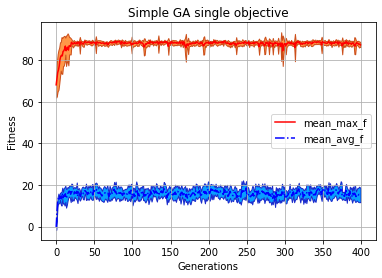

In [32]:
mean_max_f = []
mean_avgs = []
for file in file_list:
    data = get_pickle_object(file)
    max_f, avg_f = get_stats_simple_ea(data)
    mean_max_f.append(max_f)
    mean_avgs.append(avg_f)
mean_max_f = np.array(mean_max_f)
std_max_f = np.std(mean_max_f, axis=0)
mean_max_f = np.mean(mean_max_f, axis=0)
mean_avgs = np.array(mean_avgs)
std_avgs = np.std(mean_avgs, axis=0)
mean_avgs = np.mean(mean_avgs, axis=0)

plot_stats(mean_max_f, std_max_f, mean_avgs, std_avgs, title='Simple GA single objective', file_dir=OUTPUT_DIR, file_name='Simple_GA_78')